In [1]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot, ChaosTools, DynamicalSystems, Distributions, BenchmarkTools, StaticArrays, RandomNumbers, DSP, StatsBase, NPZ, TimerOutputs

In [7]:
function initial_sampling(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    x2=cos(nums[1])*sqrt(Eb/(0.5*mb*w2*w2))
    y2=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x2,-y2
end

function initial_sampling_osc(Eb,w1,w2,mb)
    nums=rand(1)*2*pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1,-x1,-y1
end



function bolz_energy(a)
    return rand(Truncated(Exponential(1), 0., 5))
end
function bolz_freq(a)
    return rand()*0.4324555320336759+0.63
end

function osc_freq(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

function osc_coupl(a)
    return rand(Truncated(Exponential(1), 0., 10))
end

alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 10*omega0/2
s = 0.1

initial_position = [0.1, 0.,0.,0.,0.,0.,0.,0.,0.]
initial_momentum=[0. ,0.1,0.,0.,0.,0.,0.,0.,0.]
#numeros=[6,8,10,16,20,26,30,36,40,50]
numeros=[30,36,40,50]
listas=[0.1,0.2,0.4,0.5,0.6,0.8,1.,1.2,1.5,1.7,2.0,2.5]
for j in 1:size(listas)[1]
    s=listas[j]
#N=numeros[ii]
N=16
initial_position=ones(N+1)
initial_momentum=ones(N+1)

#a=0.2
#b=0.01
a=2.
b=1.

m=[1.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
w=[0.,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
g=[0.,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

X0=17.    
P0=1.

golden=(1+sqrt(big(5)))/2
Es=zeros(N+1)

time=1000.
#time=1.
tspan=(0., time)
#fig=figure()
w=zeros(N+1)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
    
w=w .* 0. .+ 1.


for ii in 1:N
    ii=Int(ii)
w[ii+1] = wc*(log(N+1)-log(N+1-ii))
g[ii+1] = sqrt(alpha*wc^(2. -s)*w[ii+1]^s/(2*(N+1.)))
end

#w=(bolz_freq.(w))
Es=(bolz_energy.(Es))

#for i in 1:(N-1)/2
#    i=Int(i)
#    w[i*2+1]=w[i*2]+0.0001
#end

#println(w)
W=maximum(w)
#g=g .* 0. .+ 0.3/N

dts=0.01*2. *pi/W
#Hsys(q,p) = p[1]^2. /(2. *m[1]) +m[1]*w[1]^2. *q[1]^2. /2. +0.5* -q[1]*g[2]*q[2]+p[2]^2. /(2. *m[2])+m[2]*w[2]^2. *q[2]^2. /2. + q[1]^2. *g[2]^2. /(2. *m[2]*w[2]^2.) -q[1]*g[3]*q[3]+p[3]^2. /(2. *m[3])+m[3]*w[3]^2. *q[3]^2. /2. + q[1]^2. *g[3]^2. /(2. *m[3]*w[3]^2.) -q[1]*g[4]*q[4]+p[4]^2. /(2. *m[4])+m[4]*w[4]^2. *q[4]^2. /2. + q[1]^2. *g[4]^2. /(2. *m[4]*w[4]^2.) -q[1]*g[5]*q[5]+p[5]^2. /(2. *m[5])+m[5]*w[5]^2. *q[5]^2. /2. + q[1]^2. *g[5]^2. /(2. *m[5]*w[5]^2.) -q[1]*g[6]*q[6]+p[6]^2. /(2. *m[6])+m[6]*w[6]^2. *q[6]^2. /2. + q[1]^2. *g[6]^2. /(2. *m[6]*w[6]^2.) -q[1]*g[7]*q[7]+p[7]^2. /(2. *m[7])+m[7]*w[7]^2. *q[7]^2. /2. + q[1]^2. *g[7]^2. /(2. *m[7]*w[7]^2.) -q[1]*g[8]*q[8]+p[8]^2. /(2. *m[8])+m[8]*w[8]^2. *q[8]^2. /2. + q[1]^2. *g[8]^2. /(2. *m[8]*w[8]^2.)-q[1]*g[9]*q[9]+p[9]^2. /(2. *m[9])+m[9]*w[9]^2. *q[9]^2. /2. + q[1]^2. *g[9]^2. /(2. *m[9]*w[9]^2.) 
function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)



initial_position=initial_position .* 0.
initial_momentum=initial_momentum .* 0.
initial_position[1]=0.0 #xz0[jj]
initial_momentum[1]=0.0 #pz1[jj]
for i in 1:(N-1)/2
    i=Int(i)
    initial_position[i*2], initial_momentum[i*2],initial_position[i*2+1], initial_momentum[i*2+1]=initial_sampling_osc(Es[i*2],w[i*2],w[i*2+1],m[i*2])
end

 
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, CalvoSanz4(), dt=dts)
subplot(2, 1, 1)
title("s=$s, $N oscillators")
plot(sol[N+2,:],sol[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol.t[:], sol[N+2,:], color="b",linewidth=0.5,alpha=0.8)
savefig("ohmicos_s/s$s.png")
clf()
end

370.399336 seconds (3.76 G allocations: 150.691 GiB, 15.75% gc time)
399.080185 seconds (3.76 G allocations: 150.420 GiB, 17.17% gc time)
368.372445 seconds (3.76 G allocations: 150.420 GiB, 16.75% gc time)
338.691252 seconds (3.76 G allocations: 150.420 GiB, 16.44% gc time)
332.196807 seconds (3.76 G allocations: 150.420 GiB, 16.53% gc time)
327.260016 seconds (3.76 G allocations: 150.420 GiB, 17.07% gc time)
338.997889 seconds (3.76 G allocations: 150.420 GiB, 17.72% gc time)
355.957024 seconds (3.76 G allocations: 150.420 GiB, 16.22% gc time)
412.011211 seconds (3.76 G allocations: 150.420 GiB, 17.68% gc time)
354.349310 seconds (3.76 G allocations: 150.420 GiB, 16.05% gc time)
353.687379 seconds (3.76 G allocations: 150.420 GiB, 16.31% gc time)
335.298010 seconds (3.76 G allocations: 150.420 GiB, 16.13% gc time)


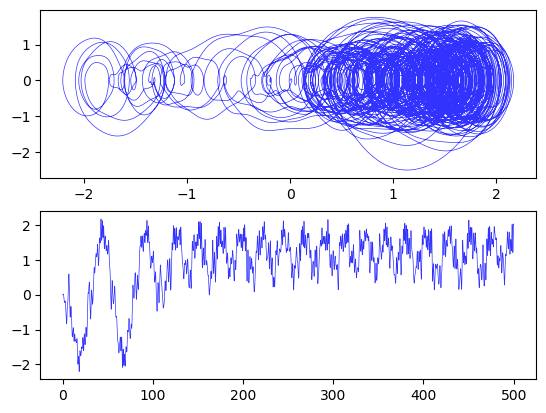

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x17cab8f50>

In [6]:
subplot(2, 1, 1)
plot(sol[N+2,:],sol[1,:],color="b",linewidth=0.5,alpha=0.8)
subplot(2, 1, 2)
plot(sol.t[:], sol[N+2,:], color="b",linewidth=0.5,alpha=0.8)